In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import dependencies to perform linear regression analysis
from scipy.stats import linregress

# Import the requests library. Import the API key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

Here's an outline of your project plan:
- Task: Collect and analyze weather data across cities worldwide.
- Purpose: PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.
- Method: Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

Your analysis of the data will be split into three main parts, or stages.

1. **Collect the Data**

- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
- Use the citipy module to list the nearest city to the latitudes and longitudes.
- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
- Parse the JSON data from the API request.
- Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

2. **Exploratory Analysis with Visualization**

- Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed
- Determine the correlations for the following weather data:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed
- Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed
    
3. **Visualize Travel Data**
Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:


1. Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
2. Create a heatmap for the new DataFrame.
3. Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.
4. Store the name of the first hotel in the DataFrame.
5. Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

# Generate Random Coordinates of World Cities

We use the **geographic coordinate system** (**GCS**) to reference any point on Earth by its latitude and longitude coordinates.

**Latitudes** are imaginary lines on Earth that run parallel east to west and are measured in angular units called degrees, minutes, and seconds, with 60 minutes in a degree and 60 seconds in a minute. Sometimes a latitude is referred to as a **parallel**.

The **equator** is an imaginary line around the middle of the earth that is equidistant from the North and South Poles and has a latitude of 0°. The equator splits Earth into Northern and Southern Hemispheres.

> All latitude lines above the equator are measured northward and considered positive, after 0° (the equator) and up to 90°, or 90° north (the North Pole). All latitude lines below the equator are measured southward and considered negative, before 0° (the equator) and down to -90°, or 90° south (the South Pole).

**Longitudes** are imaginary lines on Earth that run from the North to the South Poles and are called **meridians**. The prime meridian represents zero meridian, the origin for longitude coordinates, and splits Earth into the Eastern and Western Hemispheres.

> All meridians east of the prime meridian are considered positive, after 0° and up to 180°. All meridians west of the prime meridian are considered negative, before 0° and down to –180°.

## Generate Random Latitudes and Longitudes

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.5202686864003 -32.39272430193188
-67.24793462962407 156.98726002755183
39.82661221036204 152.01493794879696
-34.0358921974577 -117.59858559864597
5.444647235830871 93.57759029203231
-40.31694328653471 103.87785637651803
26.31140112015808 38.09882649070801
-86.24796105854584 -144.52148774809686
-0.5016014041143393 4.373637575387249
-44.329745736069775 78.53251154501481
-16.822162377259318 157.4861971130565
51.890200405830825 -109.77477146227123
9.420175816789211 -115.1458953975865
-20.440902948686215 164.16785192676423
49.59749447857163 -141.93016006525272
-39.418851516208164 86.36538606505104
-28.03172881805687 49.09559321849065
-29.62784686597503 -45.77266754926532
17.81787747196489 -37.54830287918091
63.88223613146479 -86.82119413873768
72.45263313830063 -149.18639723272935
19.92315462652742 141.22875119099342
-2.3992725547188485 -128.98322764667824
-23.207245418339852 -88.64163240043939
-77.21803542623137 139.13926231447033
-0.01602770581372681 -91.89147192418305
-60.974442039340

## Generate Random World Cities

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

# Retrieve, Collect and Clean Weather Data

## Get the City Weather Data

For each city in our **lats_lngs** list, we need to retrieve the following data and add it to a DataFrame:
- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | umm lajj
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port-gentil
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | poum
Processing Record 12 of Set 1 | macklin
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | koumac


In [10]:
city_data

[{'City': 'Klaksvik',
  'Lat': 62.2266,
  'Lng': -6.589,
  'Max Temp': 11.51,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 7.09,
  'Country': 'FO',
  'Date': '2022-08-09 01:59:21'},
 {'City': 'Pithiviers',
  'Lat': 48.1667,
  'Lng': 2.25,
  'Max Temp': 19.9,
  'Humidity': 57,
  'Cloudiness': 0,
  'Wind Speed': 5.22,
  'Country': 'FR',
  'Date': '2022-08-09 01:59:22'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 7.24,
  'Humidity': 57,
  'Cloudiness': 5,
  'Wind Speed': 3.45,
  'Country': 'NZ',
  'Date': '2022-08-09 01:59:22'},
 {'City': 'Chardara',
  'Lat': 41.2547,
  'Lng': 67.9692,
  'Max Temp': 24.69,
  'Humidity': 45,
  'Cloudiness': 1,
  'Wind Speed': 2.26,
  'Country': 'KZ',
  'Date': '2022-08-09 01:59:23'},
 {'City': 'Great Falls',
  'Lat': 47.5002,
  'Lng': -111.3008,
  'Max Temp': 33.66,
  'Humidity': 10,
  'Cloudiness': 0,
  'Wind Speed': 0.89,
  'Country': 'US',
  'Date': '2022-08-09 01:58:03'},
 {'City': 'Cidreira',
  'Lat': -30.1811,
 

## Create a DataFrame of City Weather Data

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,11.51,93,75,7.09,FO,2022-08-09 01:59:21
1,Pithiviers,48.1667,2.2500,19.90,57,0,5.22,FR,2022-08-09 01:59:22
2,Mataura,-46.1927,168.8643,7.24,57,5,3.45,NZ,2022-08-09 01:59:22
3,Chardara,41.2547,67.9692,24.69,45,1,2.26,KZ,2022-08-09 01:59:23
4,Great Falls,47.5002,-111.3008,33.66,10,0,0.89,US,2022-08-09 01:58:03
...,...,...,...,...,...,...,...,...,...
553,Vila Velha,-20.3297,-40.2925,23.97,87,0,3.09,BR,2022-08-09 02:16:12
554,Merke,42.8728,73.1786,23.99,44,3,0.24,KZ,2022-08-09 02:16:13
555,Ust-Nera,64.5667,143.2000,23.64,42,4,1.05,RU,2022-08-09 02:16:13
556,Lakhdenpokhya,61.5198,30.1992,13.85,70,99,1.29,RU,2022-08-09 02:16:14


In [14]:
city_data_columnorder = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 
                         'Cloudiness', 'Wind Speed']
city_data_ardf = city_data_df [city_data_columnorder]
city_data_ardf

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-08-09 01:59:21,62.2266,-6.5890,11.51,93,75,7.09
1,Pithiviers,FR,2022-08-09 01:59:22,48.1667,2.2500,19.90,57,0,5.22
2,Mataura,NZ,2022-08-09 01:59:22,-46.1927,168.8643,7.24,57,5,3.45
3,Chardara,KZ,2022-08-09 01:59:23,41.2547,67.9692,24.69,45,1,2.26
4,Great Falls,US,2022-08-09 01:58:03,47.5002,-111.3008,33.66,10,0,0.89
...,...,...,...,...,...,...,...,...,...
553,Vila Velha,BR,2022-08-09 02:16:12,-20.3297,-40.2925,23.97,87,0,3.09
554,Merke,KZ,2022-08-09 02:16:13,42.8728,73.1786,23.99,44,3,0.24
555,Ust-Nera,RU,2022-08-09 02:16:13,64.5667,143.2000,23.64,42,4,1.05
556,Lakhdenpokhya,RU,2022-08-09 02:16:14,61.5198,30.1992,13.85,70,99,1.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

## Latitude vs Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

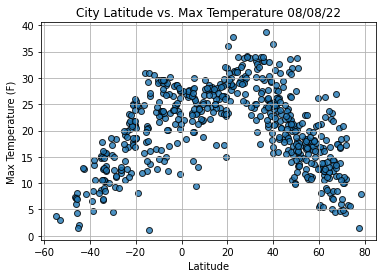

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs Humidity

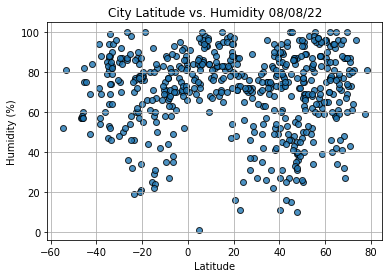

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs Clodiness

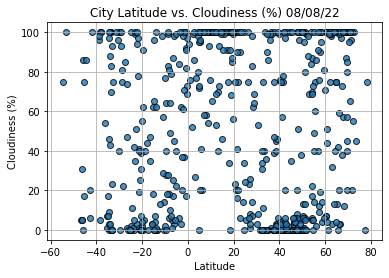

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs Wind Speed

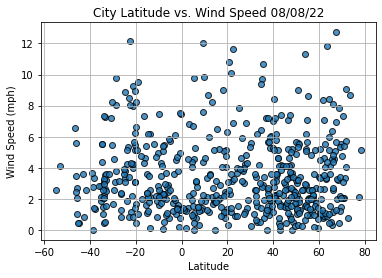

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Determine Correlations

## Find the Correlation Between Latitude and Maximum Temperature

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

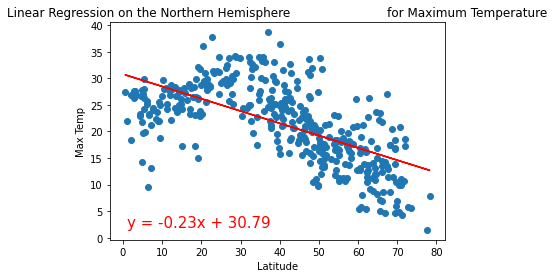

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,2))

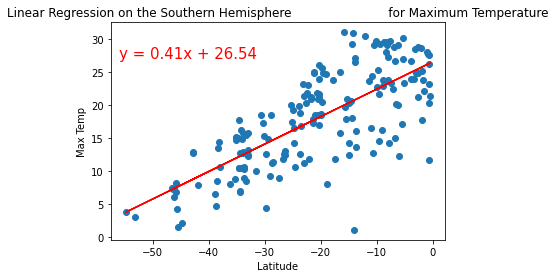

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-56,27))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.

## Find the Correlation Between Latitude and Percent Humidity

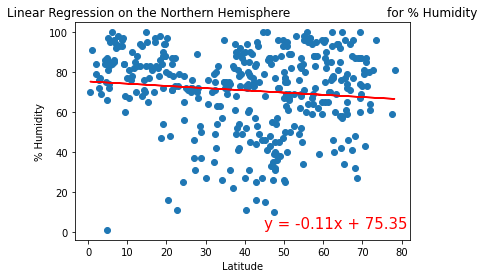

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,2))

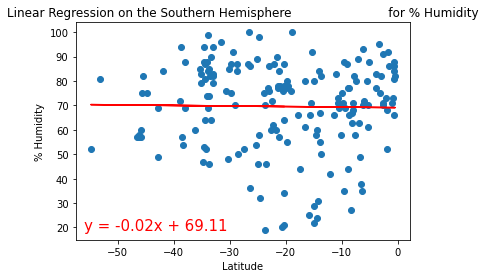

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-56,19))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

## Find the Correlation Between Latitude and Percent Cloudiness

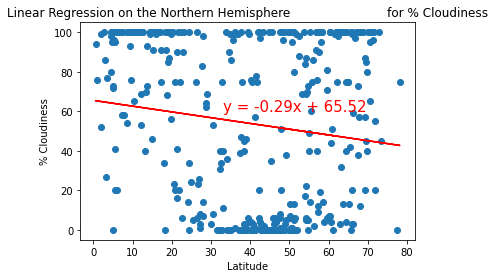

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(33,60))

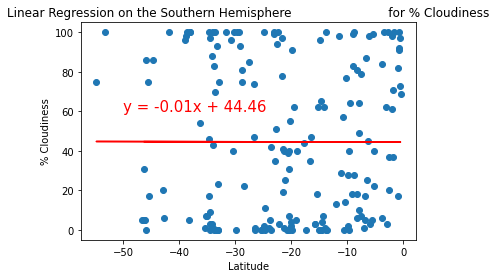

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

## Find the Correlation Between Latitude and Wind Speed

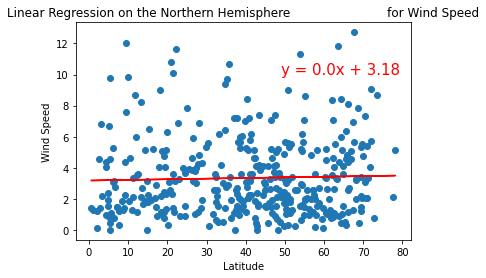

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(49,10))

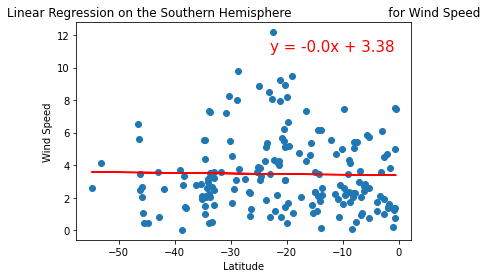

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-23,11))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.